## Importing Libraries

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 

warnings.filterwarnings("ignore") 

## Reading the Haberman Data

In [71]:
data = pd.read_csv("/home/smriti/Documents/haberman.csv")

## Top 5 datas

In [72]:
data.head(5)

,Age,Operation_Age,Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Checking of the Data 
#### Number of data ---- Type of Data --- missing value detection

In [73]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                306 non-null int64
Operation_Age      306 non-null int64
Axillary_Nodes     306 non-null int64
Survival_Status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


#### OBSERVATION
#### Total number of rows = 306
#### There are no missing values
#### The data-Type of every columns --- int64

## Columns,Shape and Check of data is balanced or not  

In [74]:
print(data.columns)

Index(['Age', 'Operation_Age', 'Axillary_Nodes', 'Survival_Status'], dtype='object')


In [75]:
print(data.shape)

(306, 4)


In [76]:
data["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

#### There are 4 columns
#### The shape of the haberman_dataset = (306 rows and 4 columns)
#### People survived = 225
#### People who did not survive = 81
#### The target column is imbalanced

## Target column

### printing the unique values of the target column

In [77]:

print(list(data['Survival_Status'].unique()))

[1, 2]


## Description of the Data

In [78]:
data.describe()

,Age,Operation_Age,Axillary_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### count -- The total columns =306
#### The mean_age = 52 #mean Auxillary_node = 4.026144 
#### The age of the patients vary from 30 to 83 with the median of 52.


#### Max number of positive lymph nodes observed is 52, 
#### nearly 75% of the patients have less than 5 positive lymph nodes and nearly
#### 25% of the patients have no positive lymph nodes based on the Quartiles"""


#### #max_age = 83
#### #Max_Auxillary_Nodes = 52

## TARGET 
To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes

# 2D Scatter Plot

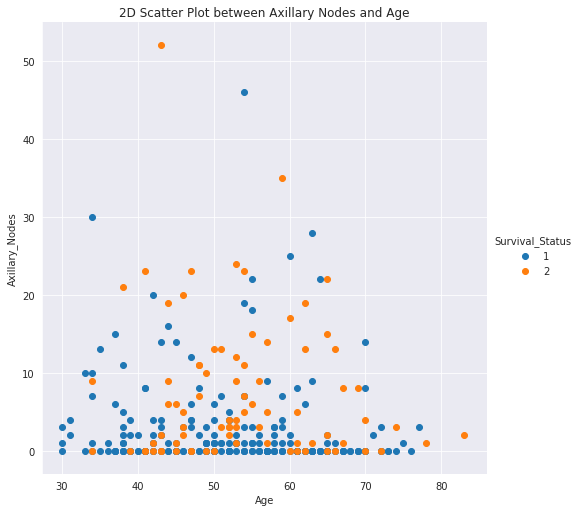

In [79]:
sns.set_style("darkgrid");
sns.FacetGrid(data, hue="Survival_Status", size=7) \
   .map(plt.scatter, "Age", "Axillary_Nodes") \
   .add_legend();
plt.title('2D Scatter Plot between Axillary Nodes and Age')

plt.show();

## PAIR PLOTS ---> Multivariate Analysis

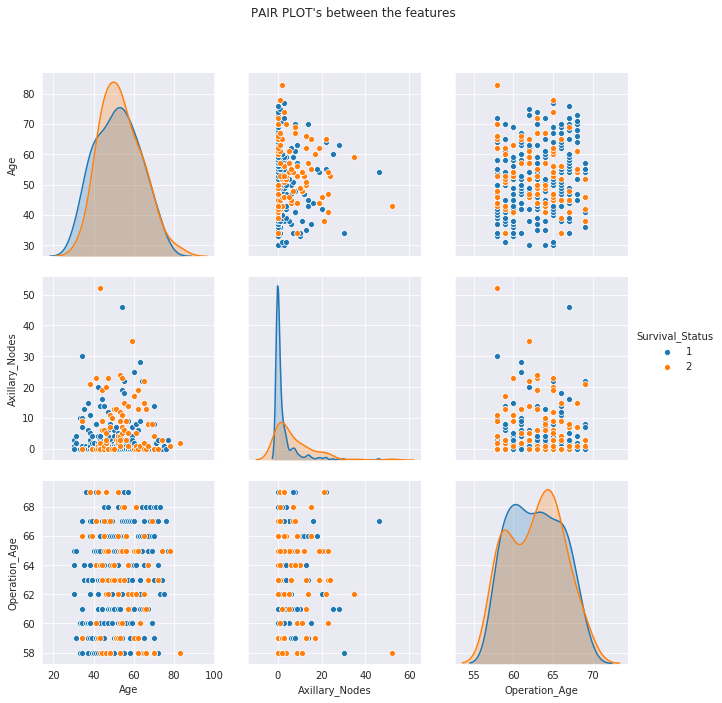

In [80]:


g = sns.set_style("darkgrid");

g = sns.pairplot(data, hue="Survival_Status", size=3,vars=["Age", "Axillary_Nodes","Operation_Age"])
g.fig.suptitle("PAIR PLOT's between the features", y=1.08)
plt.show()


#### Observation --- Any pair of features cannot clearly differentiate the Patient_Survival_Status based on 
####  AGE ,OPERATION_AGE AND AUXILARRY_NODES
#### We cannot find "lines" and "if-else" conditions to build a simple model to classify Survival Status.
####  Pair plots would not be useful if the features would be more

# PDF

## Univariate Analysis

##### Univariate analysis is done on data with only one feature to distinguish the output
##### We will do univariate Analysis based on the three variables PDF


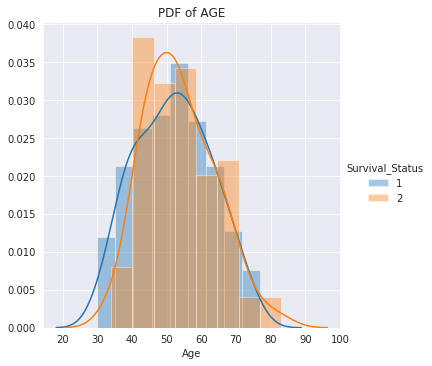

In [81]:
sns.FacetGrid(data, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title('PDF of AGE')
plt.show();


#### P(x=1/2 || Age = ? ) <--- Probability that the person Survied || When Age was ____
#### Due to too much overlapping we cannot decide the Survival_Status based on the Age

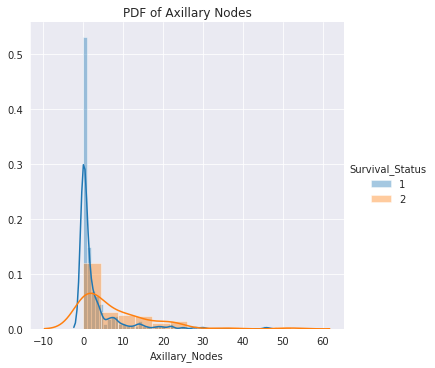

In [82]:
sns.FacetGrid(data, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Axillary_Nodes") \
   .add_legend();
plt.title('PDF of Axillary Nodes')
plt.show();


#### P(x=1/2 || Axillary_Node = ? ) <--- Probability that the person Survied || When Age was ____
_
#### Due to too much overlapping we cannot decide the Survival_Status based on the Axillary Nodes

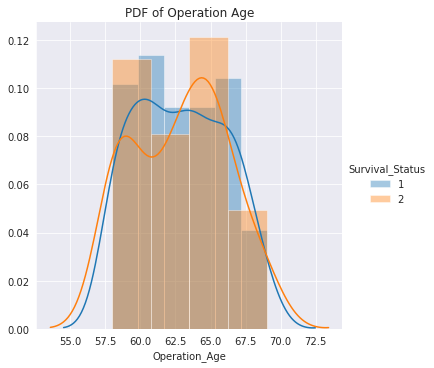

In [83]:
sns.FacetGrid(data, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Operation_Age") \
   .add_legend();
plt.title('PDF of Operation Age')
plt.show();


#### P(x=1/2 || Axillary_Node = ? ) <--- Probability that the person Survied || When Age was ____
#### Due to too much overlapping we cannot decide the Survival_Status based on the Operation_Age




#### Observation
#### Both the patients have almost the same non distinguisive PDF with Survival_Status = 1 and 0


## CDF 


#### CDF shows the probability of all x upto a certain x occuring
#### Here we will see the cdf Bsed on the Positive lymph_node or the Axillary Node


[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


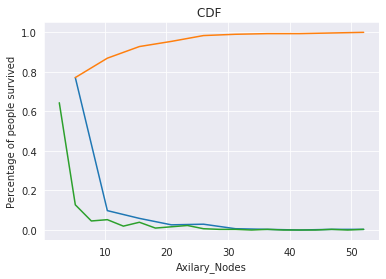

In [84]:



counts, bin_edges = np.histogram(data['Axillary_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf,label = "YES")
plt.xlabel('Axilary_Nodes')
plt.ylabel('Percentage of people survived')
counts, bin_edges = np.histogram(data['Axillary_Nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.title('CDF ')

plt.show();


#### OBSERVATION -- 77.12 % of the people who survived had the positive_lymph_node range as 0-4.6

# BOX PLOTS


#### A Box Plot is the visual representation of the five no. summary of the data.


##### 1. Q1 - 1.5*IQR
##### 2. Q1 (25th percentile)
##### 3. Q2 (50th percentile or median)
##### 4. Q3 (75th percentile)
##### 5. Q3 + 1.5*IQR"""

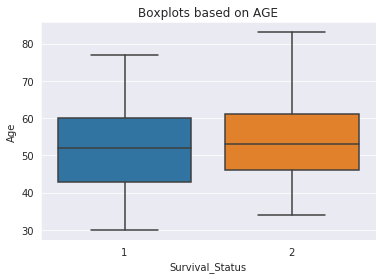

In [85]:

sns.boxplot(x='Survival_Status',y='Age', data=data)
plt.title('Boxplots based on AGE')
plt.show()

#### Obesrvation --- > Most of the people who survived where between the age  (42---60)
##### ----------------->Most of the people who did'nt survived where between the age  (45---62)

#### Conclusion - We cannot say anything about survival based on age by looking at the box plot

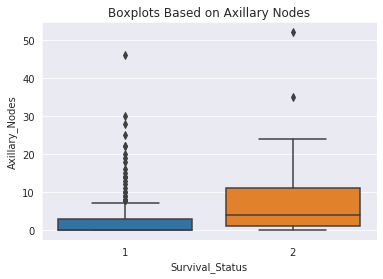

In [86]:
sns.boxplot(x='Survival_Status',y='Axillary_Nodes', data=data)
plt.title('Boxplots Based on Axillary Nodes')
plt.show()

#### Obesrvation --- > Most of the people who survived had less than 1 axillary Nodes
#### ----------------->Most of the people who did'nt survived had more axillary Nodes
#### Conclusion - We can say that people with more Axillary Nodes had less chances of survival that is
####             Survival_rate was inversely proportional to the Axillary Nodes

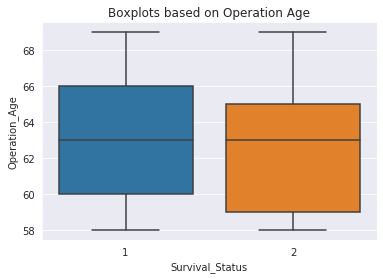

In [87]:
sns.boxplot(x='Survival_Status',y='Operation_Age', data=data)
plt.title('Boxplots based on Operation Age')
plt.show()

### Observation-- More number of people where operated between the year 1962 and 1965 who died 

# VIOLIN PLOTS

####  Violin Plots tells the same conclusion and the observation but 
####  The more Denser region of the data are fatter and the more sparse region of the Data are thinner

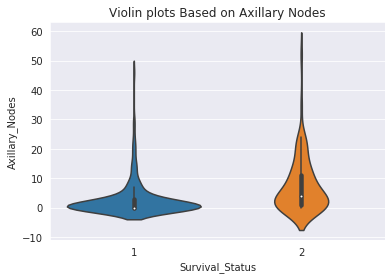

In [88]:
sns.violinplot(x='Survival_Status',y='Axillary_Nodes', data=data)
plt.title('Violin plots Based on Axillary Nodes')
plt.show()

#### As the people survived  has a denser part in near 0 --->More number of people survived who had nearly 0 
####                                                         positive lymph Node

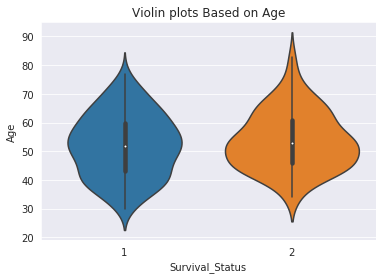

In [89]:

sns.violinplot(x='Survival_Status',y='Age', data=data)
plt.title('Violin plots Based on Age')
plt.show()

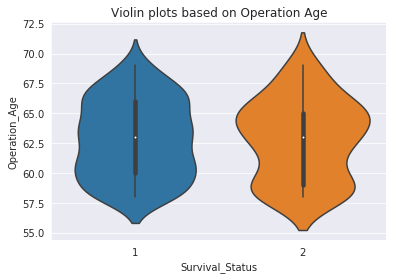

In [90]:
sns.violinplot(x='Survival_Status',y='Operation_Age', data=data)
plt.title('Violin plots based on Operation Age')
plt.show()

# FINAL OBSERVATION

### Patient’s age and operation year alone cannot decide factors for his/her survival.
### The task for classifiyng the data is tough because the Data is imbalanced